<a href="https://colab.research.google.com/github/ArasHEsLaM1/machine_learning_with_python_jadi/blob/main/Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler 
import time
from keras.models import Sequential,load_model
from keras.layers  import Dropout,LSTM,Dense
from keras.callbacks import EarlyStopping
import yfinance as yf
from keras.utils.vis_utils import plot_model 
import tensorflow as tf


In [1]:
%pip install yfinance


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.1 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


**Load the data from YFinance**

In [3]:
basic_data= yf.download("GBPUSD=X",start='2010-01-13',end='2022-1-13')
basic_data.head(5)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-13,1.615509,1.630098,1.613918,1.628611,1.628611,0
2010-01-14,1.628214,1.634735,1.625329,1.633400,1.633400,0
2010-01-15,1.633720,1.635109,1.622297,1.626995,1.626995,0
2010-01-18,1.629408,1.637733,1.625408,1.635296,1.635296,0
2010-01-19,1.635216,1.645765,1.631481,1.635671,1.635671,0


In [5]:
basic_data.shape

(3127, 6)

In [4]:
df=pd.DataFrame(basic_data)
df_close=df.reset_index()['Close']
df_close.shape


(3127,)

Basic Data plot

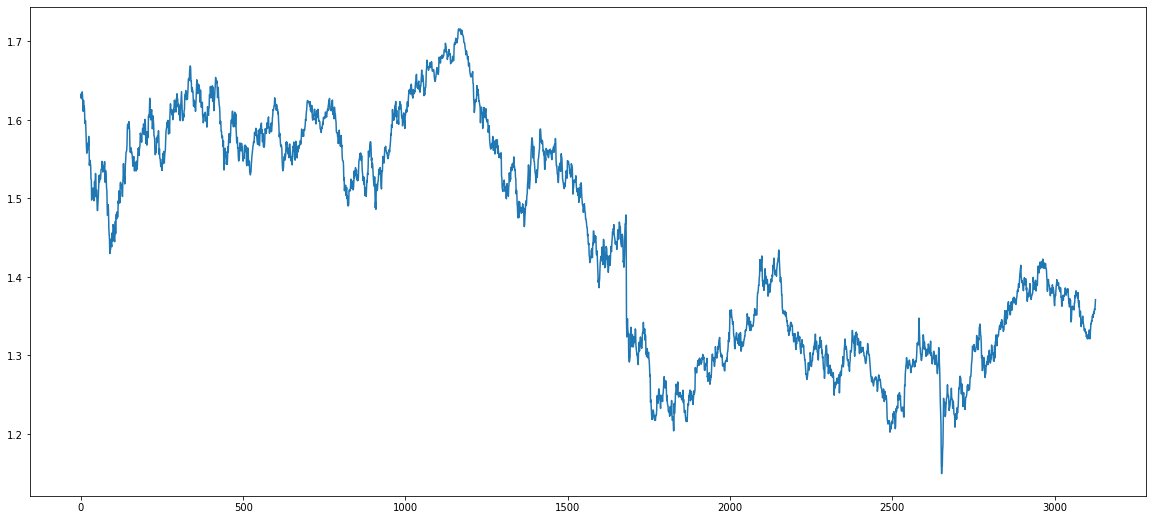

In [6]:
plt.figure(figsize=(20,9))
plt.plot(df_close)

In [7]:
scaler=MinMaxScaler(feature_range=(0,1))
df_close=scaler.fit_transform(np.array(df_close).reshape(-1,1))
df_close.shape
df_close

array([[0.84562182],
       [0.85407216],
       [0.84276935],
       ...,
       [0.3681149 ],
       [0.37745955],
       [0.39100012]])

In [8]:
trainig_size=int(len(df_close)*0.8)
testing_size=len(df_close)-trainig_size
train_data,test_data=df_close[0:trainig_size,:],df_close[trainig_size:len(df_close),:1]
trainig_size,testing_size

(2501, 626)

In [9]:
#Convert an array of values into a dataset matrix
def create_dataset(dataset,time_step=1):
  dataX,dataY=[],[]
  for i in range(len(dataset)-time_step-1):
    a=dataset[i:(i+time_step),0]    #i=0, 0,1,2,3,-----99,100
    dataX.append(a)
    dataY.append(dataset[i+ time_step,0])
  return np.array(dataX),np.array(dataY)

In [10]:
time_step=100
x_train,y_train=create_dataset(train_data,time_step)
x_test,y_test=create_dataset(test_data,time_step)


In [11]:
x_train


array([[0.84562182, 0.85407216, 0.84276935, ..., 0.52211461, 0.53430058,
        0.55989837],
       [0.85407216, 0.84276935, 0.85741902, ..., 0.53430058, 0.55989837,
        0.55690263],
       [0.84276935, 0.85741902, 0.8580796 , ..., 0.55989837, 0.55690263,
        0.5540651 ],
       ...,
       [0.29265215, 0.27568078, 0.26973937, ..., 0.10312663, 0.10055501,
        0.09988749],
       [0.27568078, 0.26973937, 0.2778792 , ..., 0.10055501, 0.09988749,
        0.10539469],
       [0.26973937, 0.2778792 , 0.28823386, ..., 0.09988749, 0.10539469,
        0.11764314]])

In [12]:
x_train.shape
#(number of records,time_step)

(2400, 100)

In [13]:
#CREATE A LSTM MODEL

In [14]:
#RESHAPE INPUT TO BE [samples,time steps,feature] which is required for LSTM
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)    #last one for convert into 3D model
x_test= x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [15]:
#CREAT LSTM MODEL CELL
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1))) #100 for time steps  LSTM LAYER 1
model.add(LSTM(50,return_sequences=True))                                         #LSTM LAYER 2
model.add(LSTM(50))                                                               #LSTM LAYER 3
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')   #LOSS FUNCRION ALGORITHM=MSE , OPTIMIZER ALGORITHM =ADAM

In [16]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=200,batch_size=64,verbose=1)

Epoch 1/200
38/38 [==============================] - 17s 252ms/step - loss: 0.0409 - val_loss: 0.0034
Epoch 2/200
38/38 [==============================] - 8s 201ms/step - loss: 0.0019 - val_loss: 0.0014
Epoch 3/200
38/38 [==============================] - 8s 205ms/step - loss: 0.0015 - val_loss: 0.0013
Epoch 4/200
38/38 [==============================] - 8s 212ms/step - loss: 0.0015 - val_loss: 0.0013
Epoch 5/200
38/38 [==============================] - 9s 237ms/step - loss: 0.0014 - val_loss: 0.0012
Epoch 6/200
38/38 [==============================] - 8s 224ms/step - loss: 0.0014 - val_loss: 0.0012
Epoch 7/200
38/38 [==============================] - 8s 206ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 8/200
38/38 [==============================] - 8s 208ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 9/200
38/38 [==============================] - 8s 207ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 10/200
38/38 [==============================] - 8s 205ms/step - loss: 0.0012 - val_l

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


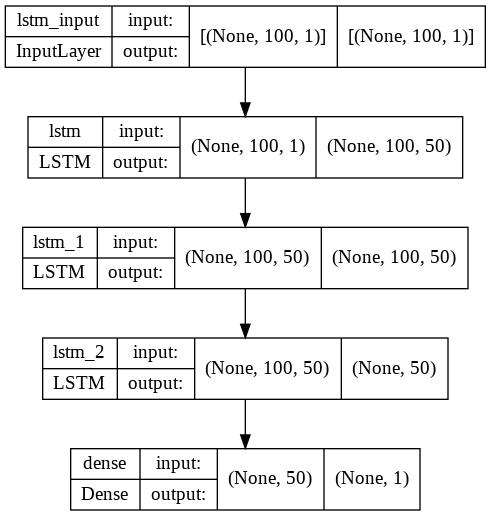

In [18]:
tf.keras.utils.plot_model(model, to_file="my_model.png", show_shapes=True)


In [19]:
#DO THE PREDICTION AND CHECK PERFORMANCE METRICS
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

In [20]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [21]:
#calculate the RMSE performance metrics
import math 
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

0.9004130561413825

In [22]:
math.sqrt(mean_squared_error(y_test,test_predict))

1.009030692707491

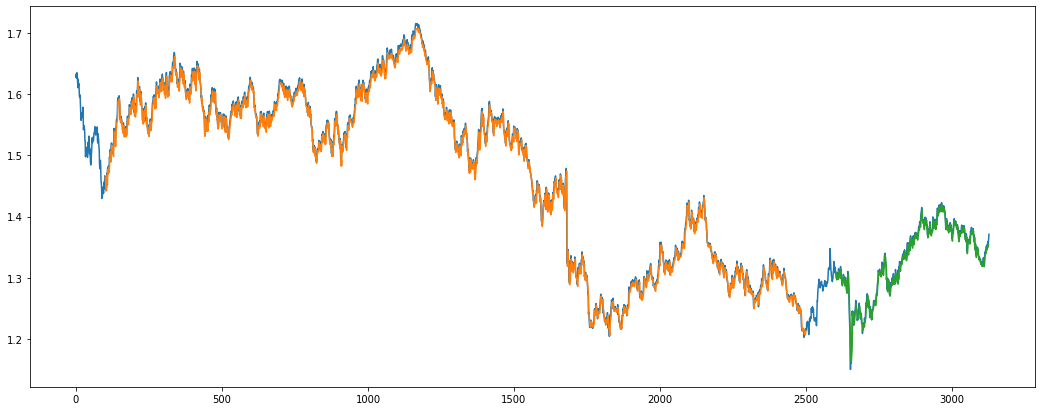

In [23]:
look_back=100
trainPredictplot = np.empty_like(df_close)
trainPredictplot[:, :]=np.nan
trainPredictplot[look_back:len(train_predict)+look_back,  :]=train_predict
testPredictionplot= np.empty_like(df_close)
testPredictionplot[:, :]= np.nan
testPredictionplot[len(train_predict)+(look_back*2)+1:len(df_close)-1, :]=test_predict
plt.figure(figsize=(18,7))
plt.plot(scaler.inverse_transform(df_close))
plt.plot(trainPredictplot)
plt.plot(testPredictionplot)
plt.show()

In [24]:
len(test_data)

626

In [25]:
x_input=test_data[526:].reshape(1,-1)

In [26]:
x_input.shape

(1, 100)

In [27]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [28]:
temp_input #previous 100 days test data to feed the model

[0.389657295024338,
 0.40035380856470004,
 0.39990592032932915,
 0.39866007996772,
 0.40187902683921317,
 0.4133798037538461,
 0.41733948076941685,
 0.4138529369813466,
 0.403319043265288,
 0.4011763745582648,
 0.41388680734578775,
 0.41408960878256407,
 0.41361647555506353,
 0.4086924398401317,
 0.41551048108960753,
 0.40635559506864327,
 0.3944713046485706,
 0.38265328233283924,
 0.3817309986203612,
 0.3746091759655892,
 0.3932077927924702,
 0.38377373923353675,
 0.3895247588156563,
 0.3613965782096167,
 0.34095718070659853,
 0.34861672169373703,
 0.3664563057572465,
 0.37290892574564216,
 0.37647583275865903,
 0.3701997173402378,
 0.3751656176671183,
 0.3745111412461517,
 0.36993885242156255,
 0.3678544575713727,
 0.38380676809824,
 0.38374092074376787,
 0.40010640764182703,
 0.395669600275002,
 0.40568365752811975,
 0.41094282051357567,
 0.40533127951297354,
 0.40030689495432537,
 0.40060794148547396,
 0.4009087776416882,
 0.3950370028472143,
 0.4070107026144134,
 0.386282249951508

In [29]:
#demonstrate prediction for the next 30 days
lst_output=[]
n_steps=100
i=0
while(i<30):
  if (len(temp_input)>100):
      x_input=np.array(temp_input[1:]) #SHIFT TO WRITE
      print("{}day input{}".format(i,x_input))
      x_input=x_input.reshape(1,-1)
      x_input=x_input.reshape((1,n_steps,1))
      yhat=model.predict(x_input,verbose=0)
      print('{}day output {}'.format(i,yhat))
      temp_input.extend(yhat[0].tolist())
      temp_input=temp_input[1:]
      lst_output.extend(yhat.tolist())
      i=i+1
  else:                                             #FIRST ELSE RUN AFTER PREDICTION AND OUR DATAS BE MORE THAN 100 WE PASS TO IF
    x_input=x_input.reshape((1,n_steps,1))#FIRST OF ALL RESHAPE THE DATA #avalin ghadam reshape
    yhat=model.predict(x_input,verbose=0) #YHAT==PREDICTION            #pass the data to the model
    print(yhat[0])
    temp_input.extend(yhat[0].tolist())# ADD YHAT TO THE PREVIOUS DATAS #ezafe kardan prediction be gheimate ghabli 
    print(len(temp_input))
    lst_output.extend(yhat.tolist())
    i=i+1
print(lst_output)

[0.38428968]
101
1day input[0.40035381 0.39990592 0.39866008 0.40187903 0.4133798  0.41733948
 0.41385294 0.40331904 0.40117637 0.41388681 0.41408961 0.41361648
 0.40869244 0.41551048 0.4063556  0.3944713  0.38265328 0.381731
 0.37460918 0.39320779 0.38377374 0.38952476 0.36139658 0.34095718
 0.34861672 0.36645631 0.37290893 0.37647583 0.37019972 0.37516562
 0.37451114 0.36993885 0.36785446 0.38380677 0.38374092 0.40010641
 0.3956696  0.40568366 0.41094282 0.40533128 0.40030689 0.40060794
 0.40090878 0.395037   0.4070107  0.38628225 0.38136915 0.3746584
 0.38833277 0.35545959 0.35240116 0.36532554 0.36453032 0.33854166
 0.3303789  0.33930384 0.33777989 0.34063888 0.35246532 0.35387946
 0.34238941 0.33587789 0.33205117 0.32405839 0.32114554 0.32587877
 0.32130185 0.31792765 0.31511704 0.31864545 0.30758477 0.31235671
 0.30913208 0.30277055 0.30523678 0.31108415 0.30338674 0.30638248
 0.31213918 0.3228359  0.30619399 0.30276445 0.31328846 0.32782768
 0.33746285 0.33705346 0.34382354 0.34

In [30]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)#30days

In [31]:
len(df_close)

3127

In [32]:
df3=df_close.tolist()
df3.extend(lst_output)
lst_output

[[0.3842896819114685],
 [0.37916257977485657],
 [0.37270012497901917],
 [0.36622676253318787],
 [0.3600578010082245],
 [0.3541097342967987],
 [0.34819892048835754],
 [0.3422057330608368],
 [0.33611419796943665],
 [0.3299831449985504],
 [0.3238984942436218],
 [0.31793713569641113],
 [0.31214848160743713],
 [0.30655309557914734],
 [0.3011484146118164],
 [0.2959189713001251],
 [0.2908437252044678],
 [0.2859010100364685],
 [0.2810722887516022],
 [0.2763419449329376],
 [0.271697998046875],
 [0.2671319246292114],
 [0.2626374363899231],
 [0.2582108676433563],
 [0.25385037064552307],
 [0.24955567717552185],
 [0.24532786011695862],
 [0.2411687821149826],
 [0.23708096146583557],
 [0.23306724429130554]]

Plotting the **prediction**

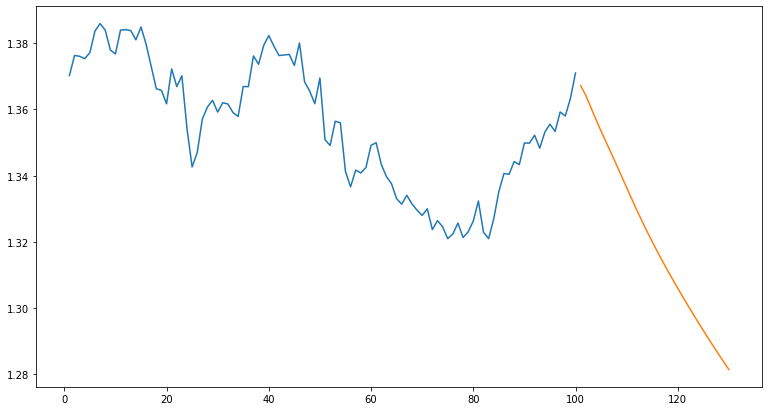

In [33]:
plt.figure(figsize=(13,7))
plt.plot(day_new,scaler.inverse_transform(df_close[3027:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

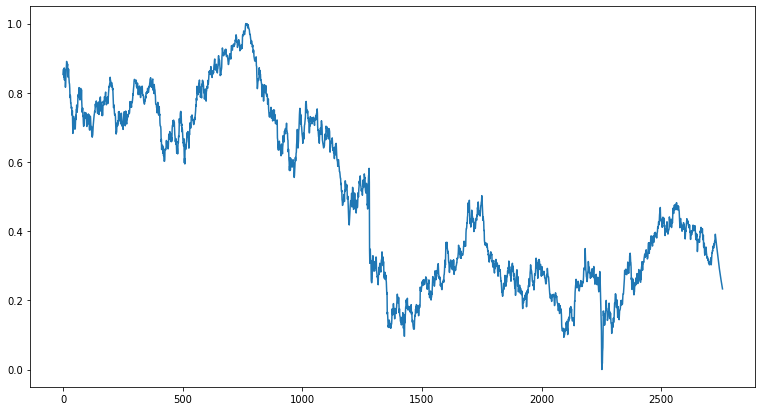

In [34]:
plt.figure(figsize=(13,7))
df3=df_close.tolist()
df3.extend(lst_output)
plt.plot(df3[400:])


[*********************100%***********************]  1 of 1 completed


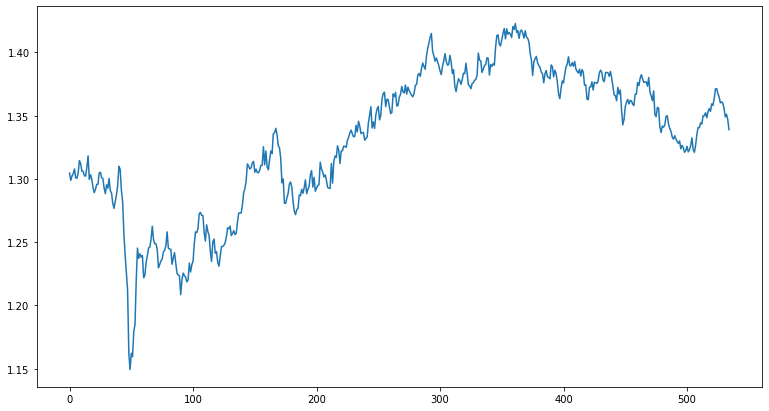

In [35]:
bb=yf.download("GBPUSD=X",start='2020-1-13',end='2022-1-30')
bb_close=bb.reset_index()['Close']
plt.figure(figsize=(13,7))
plt.plot(bb_close)